## **Práctica 10: Clasificación (Regresión Logística)**

Nombre: Barreiro Valdez Alejandro

No. Cuenta: 317520888

Email: alex.barreiro.v@gmail.com

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer).

**Objetivo.** Clasificar registros clínicos de tumores malignos y benignos de cancer de mama a partir de imágenes digitalizadas.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


#### **2) Selección de características**

Se utiliza una matriz de correlaciones con el propósito de seleccionar variables significativas.

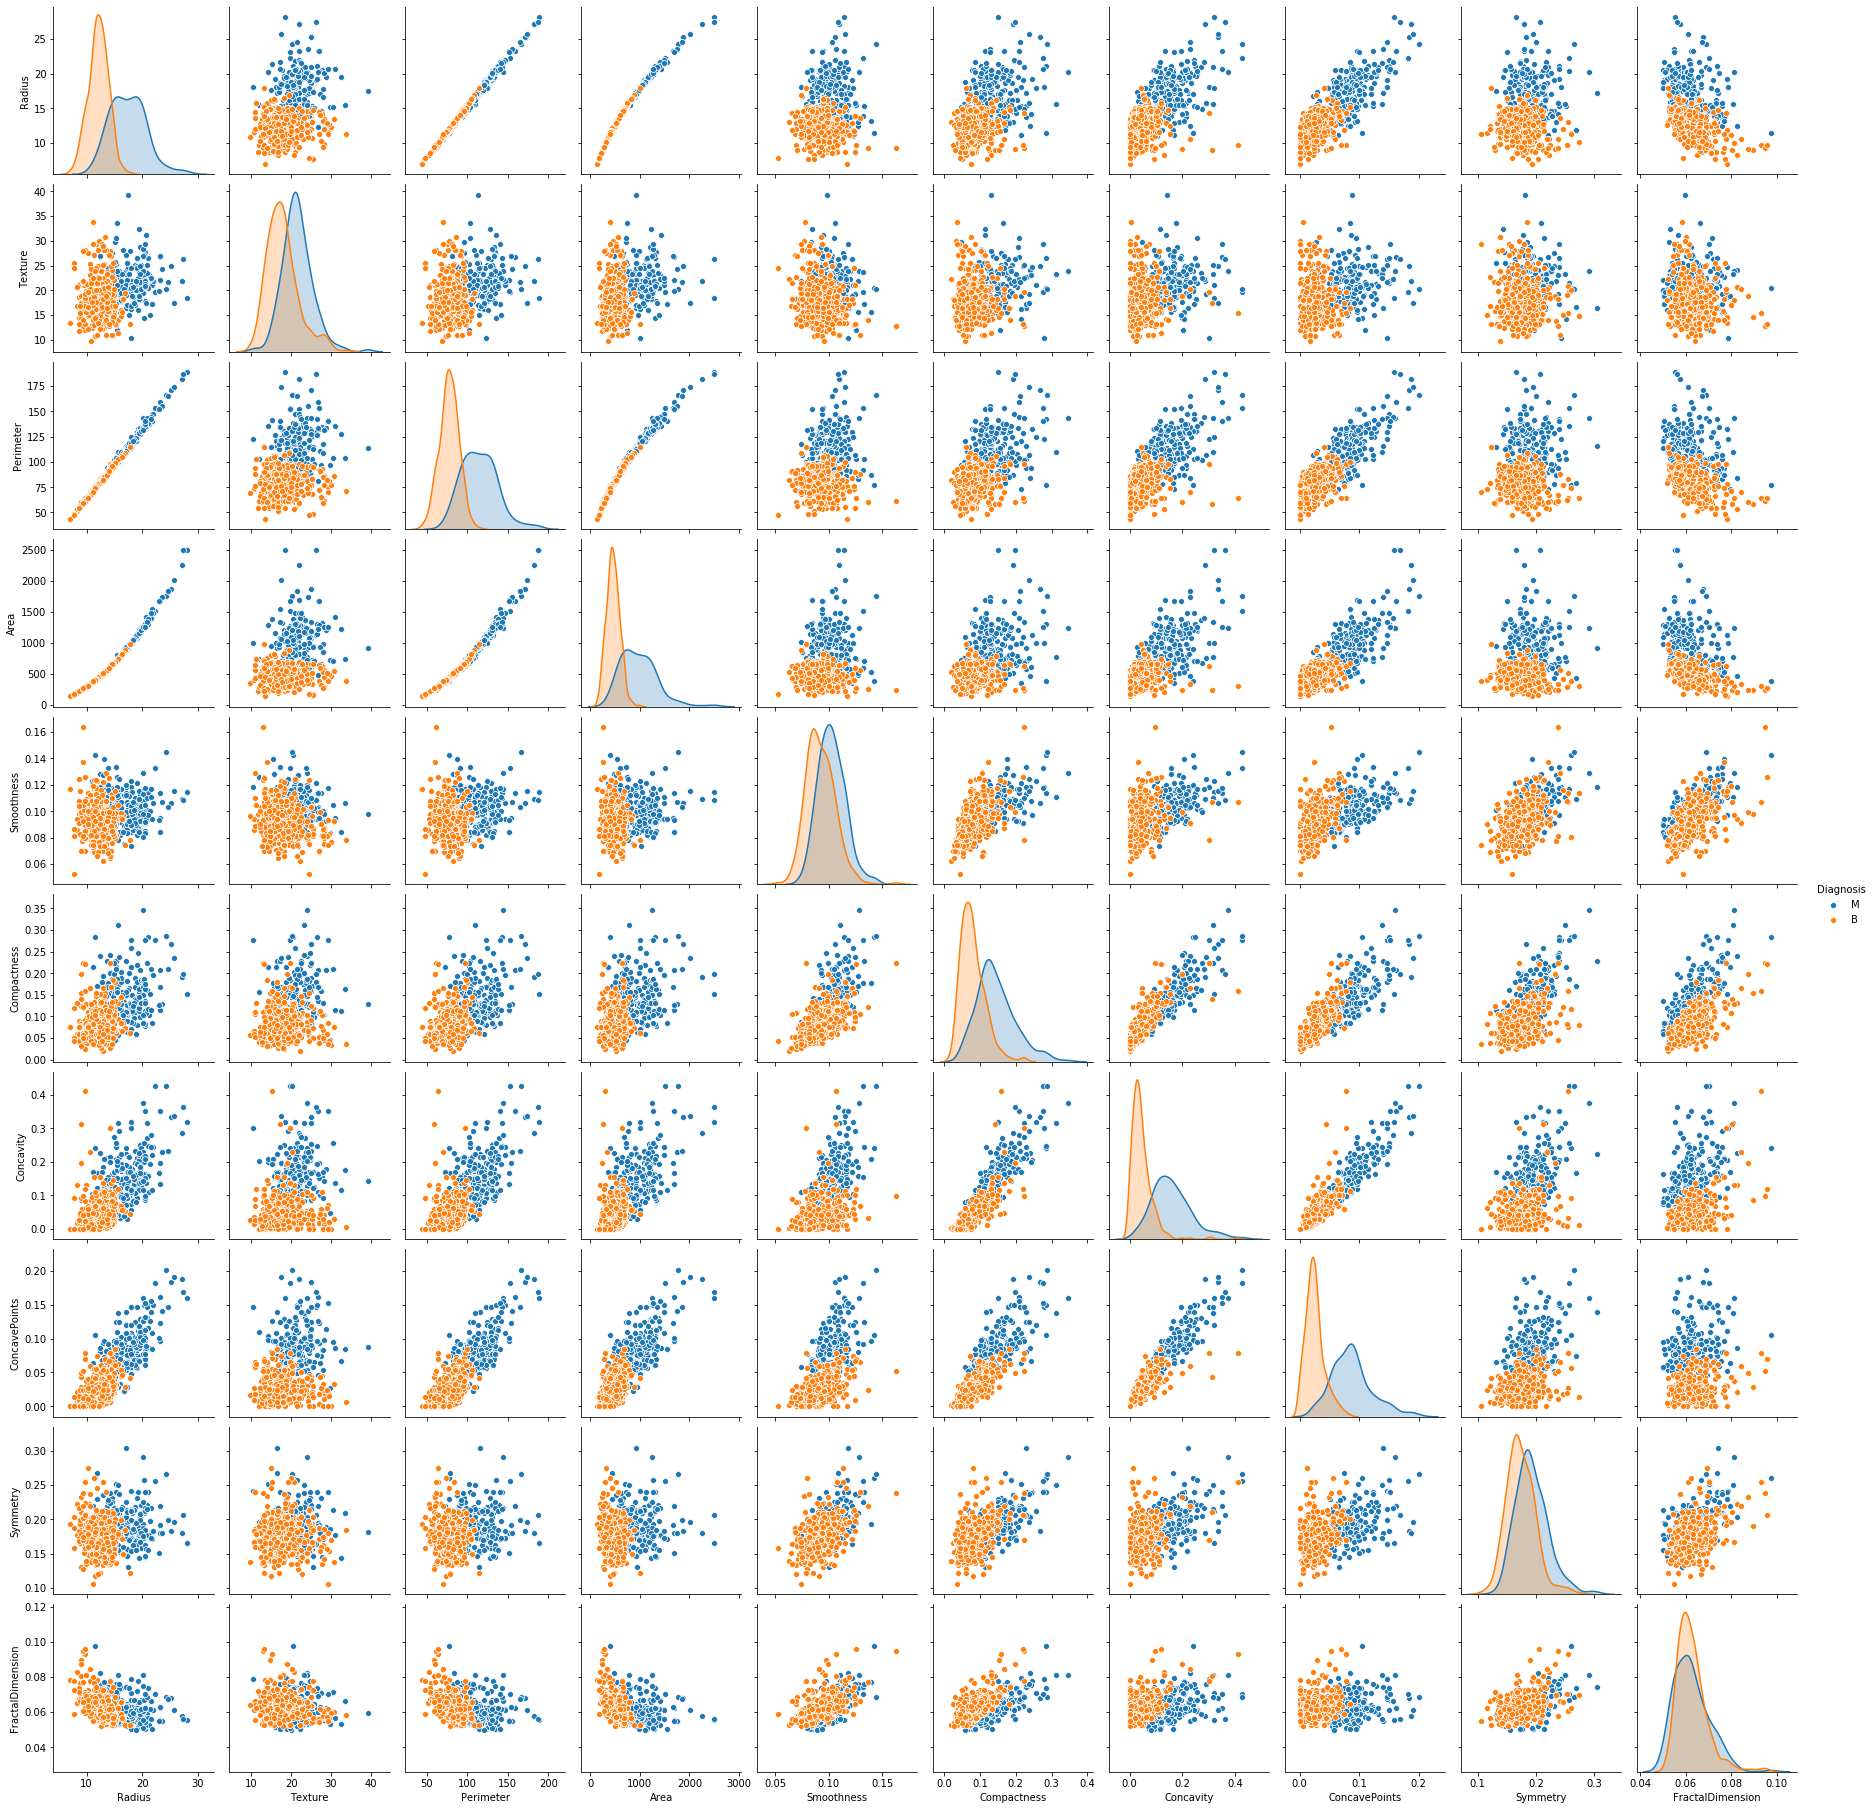

In [4]:
sns.pairplot(BCancer, hue='Diagnosis')
plt.show()

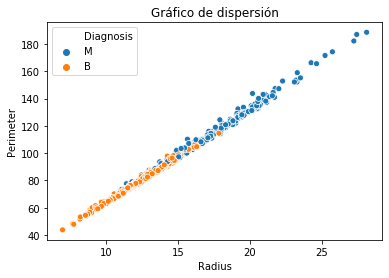

In [5]:
#plt.plot(BCancer['Radius'], BCancer['Perimeter'], 'b+')
sns.scatterplot(x='Radius', y ='Perimeter', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()

In [6]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


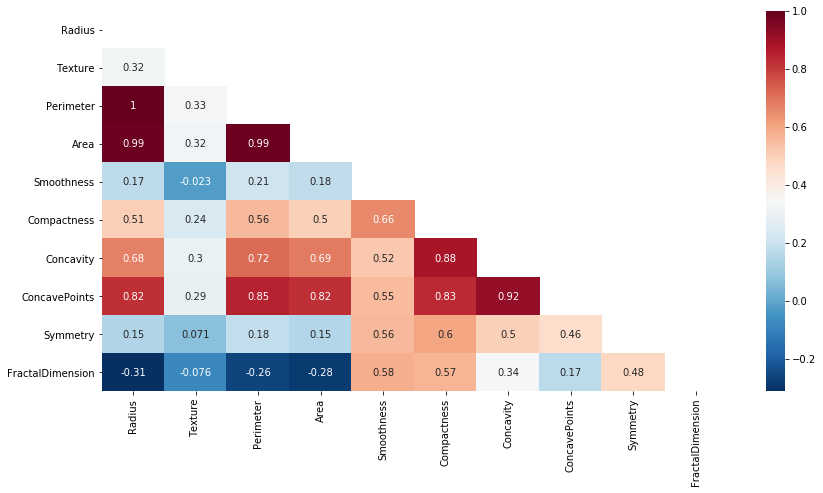

In [7]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Smoothness [Posición 6]

4) Compactness [Posición 7]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

#### **3) Definición de variables predictoras y variable clase**


In [8]:
BCancer = BCancer.replace({'M': 0, 'B': 1})
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [9]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
0    212
1    357
dtype: int64


In [10]:
#Variables predictoras
X = np.array(BCancer[['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension']])
#X = BCancer.iloc[:, [3, 5, 6, 7, 10, 11]].values  #iloc para seleccionar filas y columnas según su posición
pd.DataFrame(X)

,0,1,2,3,4,5
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.2397,0.07016


In [11]:
#Variable clase
Y = np.array(BCancer[['Diagnosis']])
pd.DataFrame(Y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


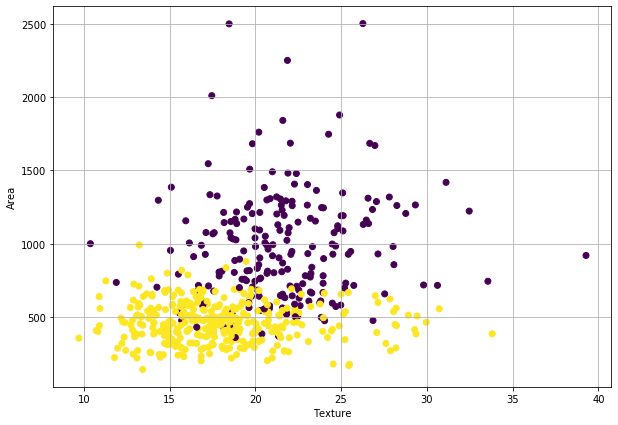

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c = BCancer.Diagnosis)
plt.grid()
plt.xlabel('Texture')
plt.ylabel('Area')
plt.show()

#### **4) Aplicación del algoritmo**

Regresión logística



In [13]:
#Se importan las bibliotecas necesarias para generar el modelo de regresión logística
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 1234,
                                                                                shuffle = True)

In [15]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,18.22,493.1,0.12180,0.16610,0.1709,0.07253
1,22.44,378.4,0.09566,0.08194,0.2030,0.06552
2,20.76,480.4,0.09933,0.12090,0.1735,0.07070
3,23.84,499.0,0.11220,0.12620,0.1905,0.06590
4,18.32,340.9,0.08142,0.04462,0.2372,0.05768
...,...,...,...,...,...,...
450,15.18,587.4,0.09516,0.07688,0.2110,0.05853
451,15.10,1386.0,0.10010,0.15150,0.1973,0.06183
452,18.60,481.9,0.09965,0.10580,0.1925,0.06373
453,18.70,1033.0,0.11480,0.14850,0.2092,0.06310


In [16]:
pd.DataFrame(Y_train)

,0
0,1
1,1
2,1
3,0
4,1
...,...
450,1
451,0
452,1
453,0


In [17]:
#Se entrena el modelo a partir de los datos de entrada
Clasificacion = linear_model.LogisticRegression()
Clasificacion.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Se generan las probabilidades

In [18]:
#Predicciones probabilísticas de los datos de prueba
Probabilidad = Clasificacion.predict_proba(X_validation)
pd.DataFrame(Probabilidad)

,0,1
0,0.050099,9.499011e-01
1,0.003135,9.968647e-01
2,0.057000,9.430004e-01
3,0.011637,9.883630e-01
4,0.065728,9.342722e-01
...,...,...
109,0.057255,9.427452e-01
110,0.990748,9.252494e-03
111,0.066344,9.336558e-01
112,0.186568,8.134320e-01


In [19]:
#Predicciones con clasificación final 
Predicciones = Clasificacion.predict(X_validation)
pd.DataFrame(Predicciones)

,0
0,1
1,1
2,1
3,1
4,1
...,...
109,1
110,0
111,1
112,1


In [20]:
#Se calcula la exactitud promedio de la validación
Clasificacion.score(X_validation, Y_validation)

0.9385964912280702

#### **5) Validación del modelo**


In [21]:
#Matriz de clasificación
Y_Clasificacion = Clasificacion.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(), 
                                   Y_Clasificacion, 
                                   rownames=['Real'], 
                                   colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,0,1
Real,,
0,39,6
1,1,68


In [22]:
#Reporte de la clasificación
print("Exactitud", Clasificacion.score(X_validation, Y_validation))
print(classification_report(Y_validation, Y_Clasificacion))

Exactitud 0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       0.92      0.99      0.95        69

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



#### **6) Ecuación del modelo de clasificación**

In [23]:
#Ecuación del modelo
print("Intercept:", Clasificacion.intercept_)
print('Coeficientes: \n', Clasificacion.coef_) 


Intercept: [12.0257237]
Coeficientes: 
 [[-0.19554751 -0.01115866 -0.70751733 -2.59203115 -1.02579301 -0.25791963]]



Prob = 1/1+𝑒^−(𝑎+𝑏𝑋))

𝑎+𝑏𝑋 = 12.025 – 0.195Texture – 0.011Area – 0.707Smoothness – 2.592Compactness – 1.025Symmetry – 0.257FractalDimension


In [24]:
#Paciente P-842302 (1) -Tumor Maligno-
PacienteID3 = pd.DataFrame({'Texture': [12.38], 
                            'Area': [1500.0], 
                            'Smoothness': [0.11840], 
                            'Compactness': [0.27760], 
                            'Symmetry': [0.2419], 
                            'FractalDimension': [0.07871]})
Clasificacion.predict(PacienteID3)

array([0])

### Paciente P-92751 (569) -Tumor Benigno-
PacienteID2 = pd.DataFrame({'Texture': [24.54], 
                            'Area': [181.0], 
                            'Smoothness': [0.05263], 
                            'Compactness': [0.04362], 
                            'Symmetry': [0.1587], 
                            'FractalDimension': [0.05884]})
Clasificacion.predict(PacienteID2)